In [501]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [502]:
class Maze:
    #  setting up the maze
    def __init__(self,maze,start_position,end_position):
        self.maze=maze
        self.start_position = start_position
        self.end_position = end_position
        self.maze_width = maze_layout.shape[0]
        self.maze_height= maze_layout.shape[1]
        
    def show_maze(self):
        plt.figure(figsize=(5,5))
        plt.imshow(self.maze,cmap='gray')
        plt.text(self.start_position[0], self.start_position[1], 'S', ha='center',va='center',color='red',fontsize=20)
        plt.text(self.end_position[0], self.end_position[1], 'E', ha='center',va='center',color='green',fontsize=20)
        plt.xticks([])
        plt.yticks([])
        plt.show()
        
    
        

In [503]:
maze_layout = np.array([
    [0,1,0,0,0],
    [0,1,1,1,0],
    [0,0,0,1,0],
    [1,1,0,1,1],
    [0,0,0,0,0],
])

In [504]:
maze = Maze(maze_layout,(0,0),(4,4))

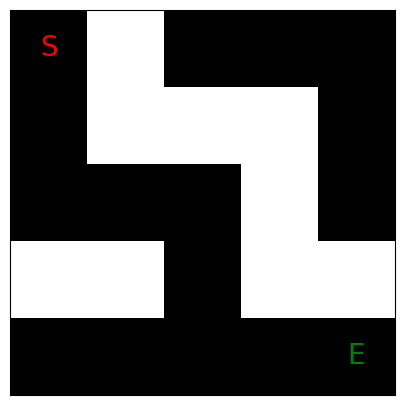

In [505]:
maze.show_maze()

In [506]:
actions = [(-1,0),(1,0),(0,-1),(0,1)] # move up, down, left and right

In [507]:
class Agent:
    def __init__(self, maze, learning_rate=0.1,discount_factor=0.9,exploration_start=1.0,exploration_end=0.01, epochs=100):
        self.q_table = np.zeros((maze.maze_height,maze.maze_width,4))
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_start = exploration_start
        self.exploration_end = exploration_end
        self.epochs = epochs
    def get_exploration_rate(self,current_episode):
        exploration_rate = self.exploration_start * (self.exploration_end/ self.exploration_start) ** (current_episode/self.epochs)
        return exploration_rate
    def get_action(self,state , current_episode):
        exploration_rate = self.get_exploration_rate(current_episode)
        
        if np.random.rand() < exploration_rate:
            return np.random.randint(4)
        else:
            return np.argmax(self.q_table[state])
        
    def update_q_table(self, state,action,next_state,reward):
        best_next_action = np.argmax(self.q_table[next_state])
        current_q_value = self.q_table[state][action]
        new_q_value = current_q_value  + self.learning_rate * (reward + self.discount_factor * self.q_table[next_state][best_next_action] - current_q_value)
        
        

In [508]:
goal_reward = 10
wall_penalty = -10
step_penalty = -1

In [509]:
def finish_episode ( agent  , maze , current_episode , train = True):
    
    current_state = maze.start_position
    is_done = False
    episode_reward = 0
    episode_step = 0
    path = [current_state]
    
    while not is_done:
        action = agent.get_action(current_state,current_episode)
        next_state = (current_state[0]+ actions[action][0], current_state[1] + actions[action][1])
        if next_state[0] < 0 or next_state[0] >= maze.maze_height or next_state[1] < 0 or next_state[1] >= maze.maze_width or maze.maze[next_state[1]][next_state[0]]==1:
            reward = wall_penalty
            next_state = current_state
        elif next_state == (maze.end_position):
            path.append(current_state)
            reward = goal_reward
            is_done = True
        else:
            path.append(current_state)
            reward = step_penalty
            
        episode_reward +=reward
        episode_step +=1
        
        if train == True:
            agent.update_q_table(current_state, action,next_state,reward)
        
        current_state = next_state
    
    return episode_reward, episode_step,path

In [510]:
def test_agent(agent,maze,epochs=1):
    episode_reward, episode_step, path = finish_episode(agent,maze,epochs,train=False)
    
    print("Learned Path:")
    for row, col in path:
        print(f"({row},{col})-> ", end='')
    print("goal!")
    
    print("number of steps: ", episode_step)
    print("Total reward: ", episode_reward)
    
    if plt.gcf().get_axes():
        plt.cla()
    plt.figure(figsize=(5,5))
    plt.imshow(maze.maze, cmap='gray')  # Correct usage
    
    plt.text(maze.start_position[0], maze.start_position[1], 'S', ha="center", va='center',color='red',fontsize=20)
    plt.text(maze.end_position[0], maze.end_position[1], 'G', ha="center", va='center',color='green',fontsize=20)
    
    for position in path:
        plt.text(position[0], position[1],"#",va="center",color="blue",fontsize=20)
    
    plt.xticks([])
    plt.yticks([])
    plt.grid(color='black',linewidth=2)
    plt.show()
    return episode_step, episode_reward

In [511]:
def train_agent(agent,maze,epochs=100):
    episode_rewards = []
    episode_steps = []
    
    for episode in range(epochs):
        episode_reward,episode_step,path = finish_episode(agent,maze,episode,train = True)
        
        episode_rewards.append(episode_reward)
        episode_steps.append(episode_step)
        
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(episode_rewards)
    plt.xlabel("episode")
    plt.ylabel("cumulative reward")
    plt.title("reward per episode")
    average_reward = sum(episode_rewards) / len(episode_rewards)
    print(f"the average reward is : {average_reward}")
    plt.subplot(1,2,2)
    plt.plot(episode_steps)
    plt.xlabel("Episode")
    plt.ylabel("Steps taken")
    plt.ylim(0,100)
    plt.title("Steps per episode")
    
    average_steps = sum(episode_steps) / len(episode_steps)
    print(f"The average steps is : {average_steps}")
    
    plt.tight_layout()
    plt.show()

In [512]:
agent = Agent(maze)



the average reward is : -212162.66666666666
The average steps is : 24837.466666666667


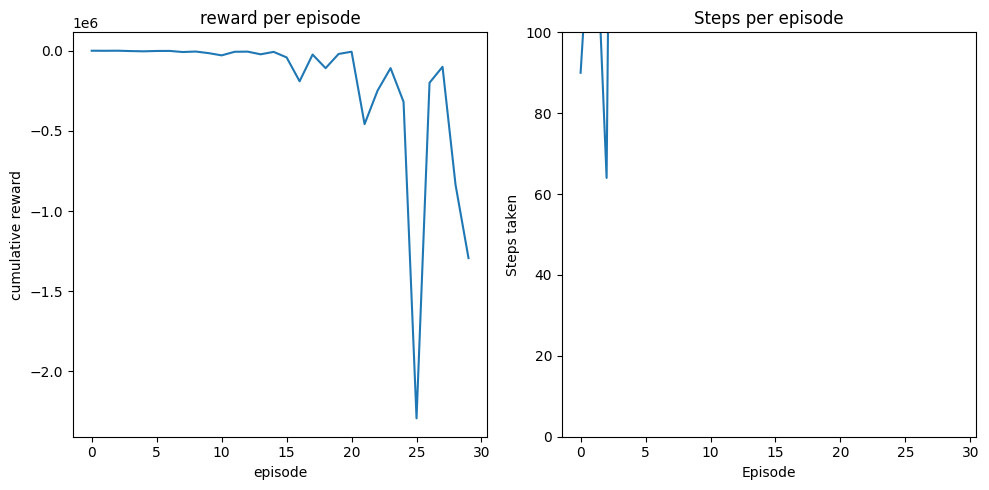

In [513]:
train_agent(agent,maze,epochs=30)


Learned Path:
(0,0)-> (0,0)-> (0,1)-> (0,2)-> (0,1)-> (0,2)-> (1,2)-> (0,2)-> (0,1)-> (0,0)-> (0,1)-> (0,2)-> (1,2)-> (0,2)-> (1,2)-> (0,2)-> (1,2)-> (0,2)-> (1,2)-> (0,2)-> (1,2)-> (0,2)-> (1,2)-> (0,2)-> (0,1)-> (0,0)-> (0,1)-> (0,2)-> (1,2)-> (0,2)-> (0,1)-> (0,2)-> (1,2)-> (0,2)-> (1,2)-> (0,2)-> (1,2)-> (0,2)-> (0,1)-> (0,0)-> (0,1)-> (0,0)-> (0,1)-> (0,2)-> (0,1)-> (0,0)-> (0,1)-> (0,2)-> (0,1)-> (0,2)-> (0,1)-> (0,2)-> (1,2)-> (0,2)-> (0,1)-> (0,0)-> (0,1)-> (0,0)-> (0,1)-> (0,2)-> (1,2)-> (0,2)-> (0,1)-> (0,2)-> (0,1)-> (0,2)-> (0,1)-> (0,2)-> (1,2)-> (0,2)-> (0,1)-> (0,0)-> (0,1)-> (0,0)-> (0,1)-> (0,2)-> (0,1)-> (0,0)-> (0,1)-> (0,2)-> (1,2)-> (0,2)-> (1,2)-> (0,2)-> (0,1)-> (0,0)-> (0,1)-> (0,2)-> (0,1)-> (0,0)-> (0,1)-> (0,2)-> (0,1)-> (0,2)-> (1,2)-> (0,2)-> (0,1)-> (0,0)-> (0,1)-> (0,2)-> (1,2)-> (0,2)-> (1,2)-> (2,2)-> (1,2)-> (0,2)-> (0,1)-> (0,0)-> (0,1)-> (0,2)-> (1,2)-> (0,2)-> (0,1)-> (0,2)-> (0,1)-> (0,2)-> (0,1)-> (0,0)-> (0,1)-> (0,2)-> (1,2)-> (0,2)-> (0,1)-> (0

<Figure size 640x480 with 0 Axes>

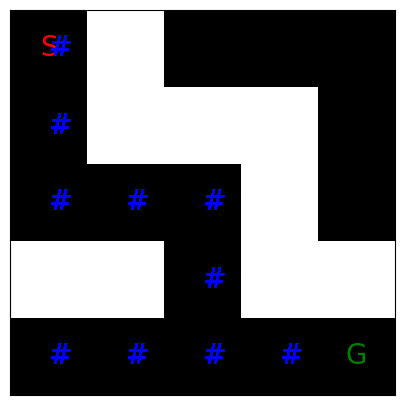

(281229, -2494471)

In [514]:
test_agent(agent,maze,epochs=30)
